# 作業 : (Kaggle)鐵達尼生存預測
https://www.kaggle.com/c/titanic

# [作業目標]
- 試著模仿範例寫法, 在鐵達尼生存預測中, 觀察填補缺值以及 標準化 / 最小最大化 對數值的影響

# [作業重點]
- 觀察替換不同補缺方式, 對於特徵的影響 (In[4]~In[6], Out[4]~Out[6])
- 觀察替換不同特徵縮放方式, 對於特徵的影響 (In[7]~In[8], Out[7]~Out[8])

In [35]:
# 做完特徵工程前的所有準備 (與前範例相同)
import pandas as pd
import numpy as np
import copy
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

data_path = 'data/'

# ***補Survived csv檔案
df_train = pd.read_csv(data_path + 'titanic_train.csv')
df_test = pd.read_csv(data_path + 'titanic_test.csv')

train_Y = df_train['Survived']
ids = df_test['PassengerId']

# 用法：DataFrame.drop(labels=None,axis=0, index=None, columns=None, inplace=False)
# labels就是要刪除的行列的名字，用列表給定
# axis默認為0，指刪除行，因此刪除columns時要指定axis=1；
# index直接指定要刪除的行
# columns直接指定要刪除的列
# inplace =False，默認該刪除操作不改變原數據，而是返回一個執行刪除操作後的新dataframe；
# inplace=True，則會直接在原數據上進行刪除操作，刪除後無法返回。

df_train = df_train.drop(['PassengerId', 'Survived'] , axis=1) #刪除'PassengerId', 'Survived'
df_test = df_test.drop(['PassengerId'] , axis=1)#刪除'PassengerId'

# 合併資料 (直向合併,變更多筆)
df = pd.concat([df_train,df_test])
#df = pd.concat([df_test,df_train])
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NaN
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NaN
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,NaN


In [36]:
#只取 int64, float64 兩種數值型欄位, 存於 num_features 中
num_features = []

print(list(zip(df.dtypes, df.columns)))
#[(dtype('int64'), 'Pclass'), (dtype('O'), 'Name'), (dtype('O'), 'Sex'), (dtype('float64'), 'Age')
#, (dtype('int64'), 'SibSp'), (dtype('int64'), 'Parch'), (dtype('O'), 'Ticket')
#, (dtype('float64'), 'Fare'), (dtype('O'), 'Cabin'), (dtype('O'), 'Embarked'), (dtype('float64'), 'Survived')]

# 如果把Age其中一筆改為字串就變成(dtype('O'), 'Age')

for dtype, feature in zip(df.dtypes, df.columns):
    if dtype == 'float64' or dtype == 'int64':
        num_features.append(feature)
print(f'{len(num_features)} Numeric Features : {num_features}\n')

[(dtype('int64'), 'Pclass'), (dtype('O'), 'Name'), (dtype('O'), 'Sex'), (dtype('float64'), 'Age'), (dtype('int64'), 'SibSp'), (dtype('int64'), 'Parch'), (dtype('O'), 'Ticket'), (dtype('float64'), 'Fare'), (dtype('O'), 'Cabin'), (dtype('O'), 'Embarked'), (dtype('float64'), 'Survived')]
6 Numeric Features : ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']



In [53]:
# 削減文字型欄位, 只剩數值型欄位
df = df[num_features]
train_num = train_Y.shape[0]
df.head()

,Pclass,Age,SibSp,Parch,Fare,Survived
0,3,34.5,0,0,7.8292,NaN
1,3,47.0,1,0,7.0000,NaN
2,2,62.0,0,0,9.6875,NaN
3,3,27.0,0,0,8.6625,NaN
4,3,22.0,1,1,12.2875,NaN


# 作業1
* 試著在補空值區塊, 替換並執行兩種以上填補的缺值, 看看何者比較好?

In [66]:
# 一開始會出錯 ValueError: could not convert string to float: 'C'
df.head()
# 空值補 -1, 做羅吉斯迴歸
df_m1 = df.fillna(0) # Nan取代0
#df_m1.head()

train_X = df_m1[:train_num]
estimator = LogisticRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean() # 交叉驗證

# 原值  0.6386976477337923


0.6386976477337923

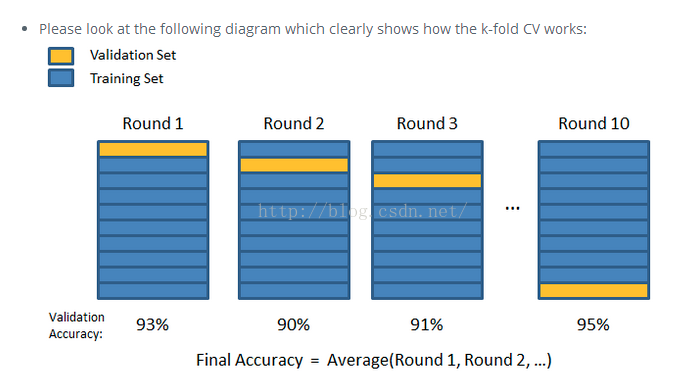

# 作業2
* 使用不同的標準化方式 ( 原值 / 最小最大化 / 標準化 )，搭配羅吉斯迴歸模型，何者效果最好?

In [81]:

# 搭配標準化 0.6386976477337923
df_m2 = df.fillna(0)
df_temp = StandardScaler().fit_transform(df_m2)
train_X = df_temp[:train_num]
estimator = LogisticRegression()
ans2=cross_val_score(estimator, train_X, train_Y, cv=5).mean()
print("標準化:",ans2)

# 搭配最大最小化: 0.6291738382099827
df_m3 = df.fillna(0)
df_temp = MinMaxScaler().fit_transform(df_m3)
train_X = df_temp[:train_num]
estimator = LogisticRegression()

ans3=cross_val_score(estimator, train_X, train_Y, cv=5).mean()
print("最大最小化:",ans3)

# 原本預測標準化最好；結果標準化和原本差不多

標準化: 0.6386976477337923
最大最小化: 0.6291738382099827


![](LogisticRegression.png)

![LogisticRegression.png](LogisticRegression.png)